In [ ]:
import pandas as pd

salary_df = pd.read_csv('salary_data.csv')
salary_df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
print(salary_df.isnull().sum())


YearsExperience    0
Salary             0
dtype: int64


In [ ]:
X = salary_df['YearsExperience'].values
y = salary_df['Salary'].values


In [ ]:
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std


In [ ]:
import numpy as np

def gradient_descent(X, y, lr, epochs):
    m = 0.0
    b = 0.0
    N = len(y)
    history = []
    for epoch in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        m_grad = (2/N) * np.dot(error, X)
        b_grad = (2/N) * error.sum()
        m -= lr * m_grad
        b -= lr * b_grad
        history.append((m, b, y_pred.copy()))
    return m, b, history


In [ ]:
best_r2 = -np.inf
best_params = None
for lr in [0.001, 0.01, 0.1]:
    for epochs in [100, 200, 500]:
        m, b, history = gradient_descent(X_scaled, y, lr=lr, epochs=epochs)
        y_pred = m * X_scaled + b
        ssr = ((y - y_pred)**2).sum()
        sst = ((y - y.mean())**2).sum()
        r2 = 1 - ssr/sst
        if r2 > best_r2:
            best_r2 = r2
            best_params = (lr, epochs, m, b, history)
print("Best learning rate and epochs:", best_params[0], best_params[1])
print("Best R²:", best_r2)


Best learning rate and epochs: 0.1 100
Best R²: 0.9569566641435086


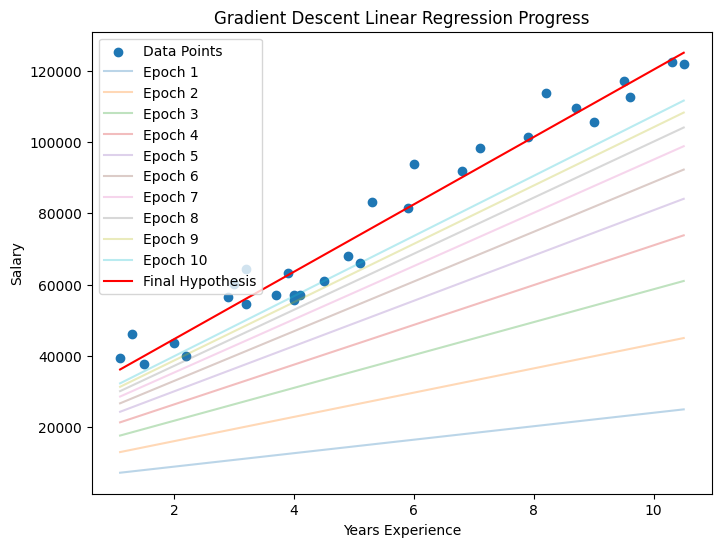

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

m, b, history = best_params[2], best_params[3], best_params[4]
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Data Points')
for idx, (m_i, b_i, y_pred_i) in enumerate(history[:10]):
    X_plot = X_scaled * X_std + X_mean
    plt.plot(X_plot, m_i * X_scaled + b_i, alpha=0.3, label=f'Epoch {idx+1}')
plt.plot(X_plot, m * X_scaled + b, color='red', label='Final Hypothesis')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Gradient Descent Linear Regression Progress')
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Predict using best parameters
y_pred_best = m * X_scaled + b
r2 = r2_score(y, y_pred_best)
print(f'Final R²: {r2:.4f}')


Final R²: 0.9570
